# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= red> RED</font>___

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew   
import statsmodels
# Importing metrics from sklearn for evaluation
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
# Loading the data using Pandas
os.chdir(r'E:\UpGrad\ML 1\Lead+Scoring+Case+Study\Lead Scoring Assignment')
df = pd.read_csv('Leads.csv')

## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking the percentage of missing values
column_wise_null_percent=round(100*(df1.isnull().sum()/len(df1.index)), 2)
column_wise_null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# droping the columns having motre than 40% missing values

col_ind = column_wise_null_percent.index

columns=[]

for i in col_ind:
    if column_wise_null_percent[i] >=40:
        columns.append(i)
print('The list of columns droped:\n',columns)
print('\n The total no.of columns:',len(columns))
df2=df1.drop(columns,axis=1)
    
# Removing all the columns that are no required and have 40% null values
df2.head()

The list of columns droped:
 ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

 The total no.of columns: 7


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,interested in other courses,NaN,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,ringing,NaN,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,ringing,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified


In [13]:
# Rechecking the percentage of missing values
column_wise_null_percent=round(100*(df2.isnull().sum()/len(df2.index)), 2)
column_wise_null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# checking the  columns having missing values less than 13%
column_wise_null_percent=((df2.isna().sum(axis=0)/len(df2))*100).round(2)

Col_ind = column_wise_null_percent.index # to know the index of each column. 

# collecting the all the columns having more than or equal to 1% and less than 13 % missing values

col_13 = []

for i in Col_ind:
    if column_wise_null_percent[i] >0 and column_wise_null_percent[i]<13:
        col_13.append(i) 
print('The list of columns having missing values less than 13%: \n',col_13)# list of columns having missing values more than or equal to 1% and less than 13%

print('No. of columns having missing values less than 13%: ', len(col_13)) # No. of columns having missing values more than or equal to 1% and less than 13%


The list of columns having missing values less than 13%: 
 ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']
No. of columns having missing values less than 13%:  4


In [15]:
# row-wise percentage 
row_wise_null_percent=((df1.isna().sum(axis=1)/len(df1.index))*100).round(2)

row_ind = row_wise_null_percent.index # to know the index of each column. 

# collecting the all the columns having more then or equal to 30% missing values

row_25 = []

for i in row_ind:
    if row_wise_null_percent[i] >=25 :
        row_25.append(i) 
print(len(row_25)) # total no. of missing values along the row is Zero.

0


### <font color= red>___There is a huge value of null variables in 6 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with <font color = green> 'NA'</font>. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

### <font color=green>___There are 4 columns having missing values less than <font color=red> 13%</font>. These columns missing values need to be imputed.___</font>

In [16]:
# Replacing the missing values with NA
df2['Specialization'] = df2['Specialization'].fillna('NA') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('NA')
df2['Country'] = df2['Country'].fillna('NA')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('NA')
df2['Tags'] = df2['Tags'].fillna('NA')
df2['City'] = df2['City'].fillna('NA')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###  Missing Value Imputation
### <font color = blue>___Columns having missing values less than 13%, need to be imputed.___</font>


In [17]:
# Inspecting the columns (Data Type)
df2[col_13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Source           9204 non-null   object 
 1   TotalVisits           9103 non-null   float64
 2   Page Views Per Visit  9103 non-null   float64
 3   Last Activity         9137 non-null   object 
dtypes: float64(2), object(2)
memory usage: 288.9+ KB


### <font color = red>___From the above information we can impute 2 columns with mode and another 2 columns with mean (based on Dtype).___</font>

In [18]:
# impute the missing value with mean:
df2['TotalVisits'] = df['TotalVisits'].fillna(df2['TotalVisits'].mean())
df2['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df2['Page Views Per Visit'].mean())

In [19]:
df2['Lead Source'].mode()

0    google
dtype: object

In [20]:
df2['Last Activity'].mode()

0    email opened
dtype: object

In [21]:
# impute the missing value with mode:
df2['Lead Source'] = df['Lead Source'].fillna('google')
df2['Last Activity'] = df['Last Activity'].fillna('email opened')


In [22]:
# Rechecking the percentage of missing values
column_wise_null_percent=round(100*(df2.isnull().sum()/len(df2.index)), 2)
column_wise_null_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [23]:
df2['Last Activity'].value_counts()

email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

In [24]:
# Grouping the response which is have very less count:
df2['Last Activity'] = df2['Last Activity'].str.replace('had a phone conversation','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('approached upfront','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('view in browser link clicked','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('email received','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('email marked spam','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('visited booth in tradeshow','others')
df2['Last Activity'] = df2['Last Activity'].str.replace('resubscribed to emails','others')

df2['Last Activity'].value_counts()

email opened                 3540
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
form submitted on website     116
unreachable                    93
unsubscribed                   61
others                         51
Name: Last Activity, dtype: int64

In [25]:
df2['Last Notable Activity'].value_counts()

modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
form submitted on website          1
approached upfront                 1
email received                     1
resubscribed to emails             1
view in browser link clicked       1
Name: Last Notable Activity, dtype: int64

In [26]:
# Grouping the response which is have very less count:
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('had a phone conversation','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('email marked spam','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('approached upfront','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('email received','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('email marked spam','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('form submitted on website','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('resubscribed to emails','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('email marked spam','others')
df2['Last Notable Activity'] = df2['Last Notable Activity'].str.replace('view in browser link clicked','others')
df2['Last Notable Activity'].value_counts()

modified                   3407
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
email bounced                60
unsubscribed                 47
unreachable                  32
others                       21
Name: Last Notable Activity, dtype: int64

In [27]:
def origin(x):
    country = ""
    if x == "india":
        country = "India"
    elif x == "NA":
        country = "NA"
    else:
        country = "Outside India"
    return country

df2['Country'] = df2.apply(lambda x:origin(x['Country']), axis = 1)
df2['Country'].value_counts()

India            6492
NA               2461
Outside India     287
Name: Country, dtype: int64

In [28]:
# percentage of the rows retained after data cleansing
percent_rows_retained = round(((df2.shape[0]/df.shape[0])*100),2) # 9240 was the original no. of rows before cleansing the data
print('Percentage of the rows retained after data cleansing:\t',percent_rows_retained)

Percentage of the rows retained after data cleansing:	 100.0


In [29]:
# Inspecting the DataFrame after Data Cleansing
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [30]:
# inspecting the shape of dataframe after cleansing the data
df2.shape

(9240, 25)

In [31]:
# copying the data frame
df3 = df2

In [32]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick ad

In [33]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',1)
df_final.shape

(9240, 24)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

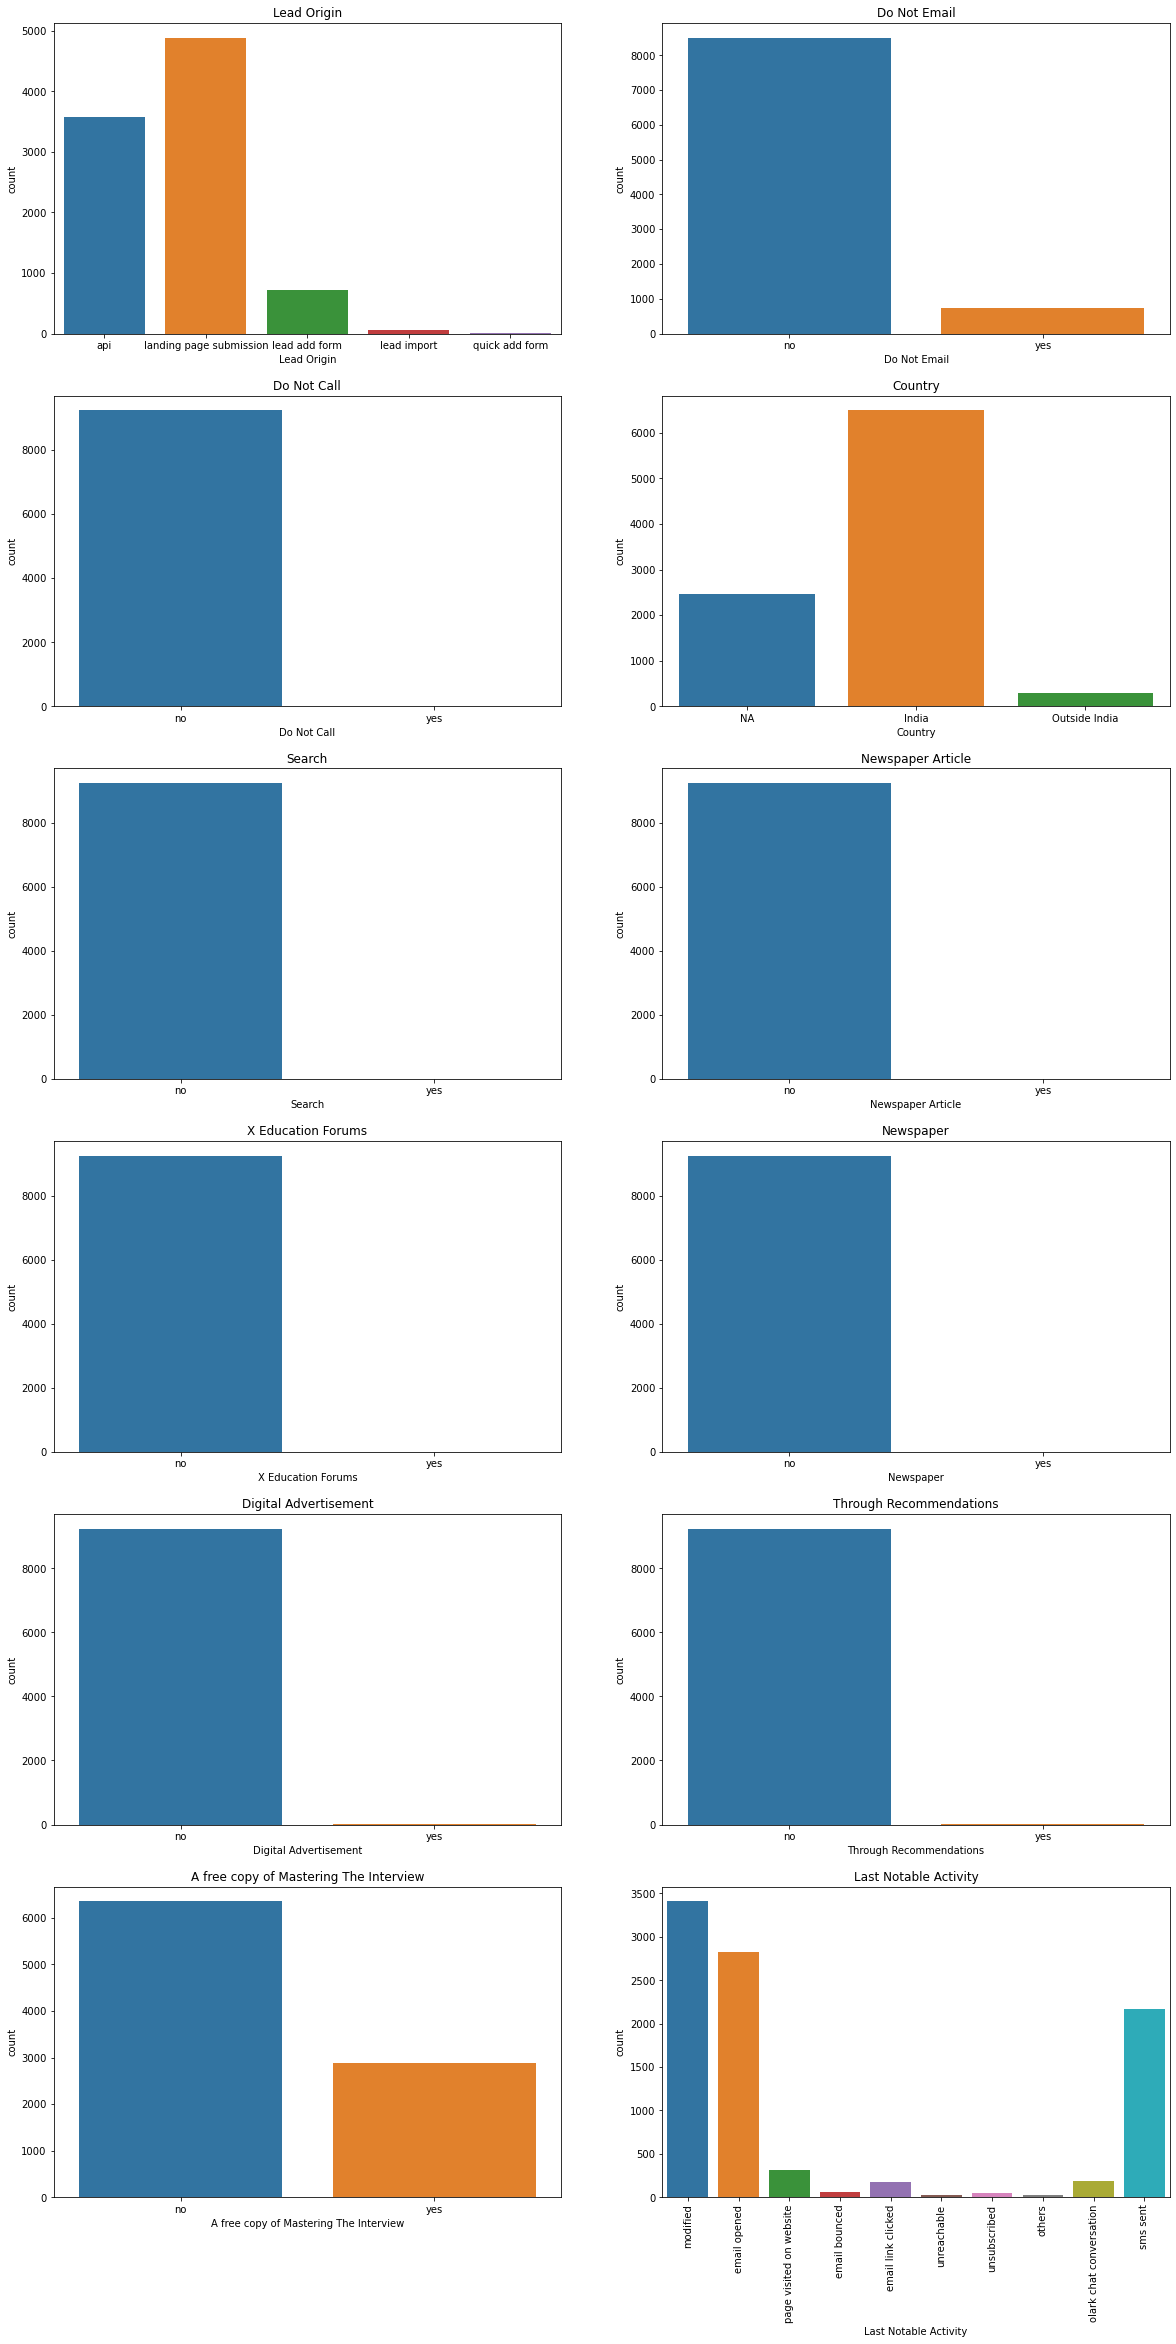

In [35]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

In [36]:
# Dropping Skew Columns:
Skew = ['Do Not Email','Do Not Call','Search','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations']
df_final = df_final.drop(Skew,axis = 1)
df_final.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,0,0.0,0,0.0,page visited on website,NA,NA,unemployed,better career prospects,interested in other courses,NA,no,modified
1,660728,api,organic search,0,5.0,674,2.5,email opened,India,NA,unemployed,better career prospects,ringing,NA,no,email opened
2,660727,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,India,business administration,student,better career prospects,will revert after reading the email,mumbai,yes,email opened
3,660719,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,India,media and advertising,unemployed,better career prospects,ringing,mumbai,no,modified
4,660681,landing page submission,google,1,2.0,1428,1.0,converted to lead,India,NA,unemployed,better career prospects,will revert after reading the email,mumbai,no,modified


In [37]:
# Inspect the dataframe after dropping skew columns(categorical)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

### <font color = red>___From the above plot we can observe that there some columns which can be dropped during analysis. As these skew columns, by considering these columns for analyis will not show any effect.___</font> 

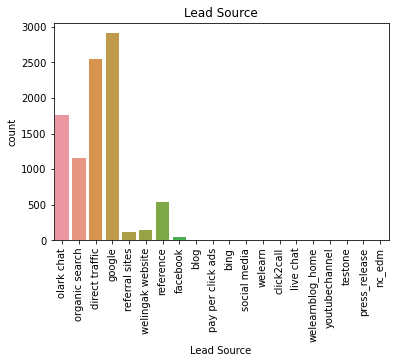

In [38]:
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

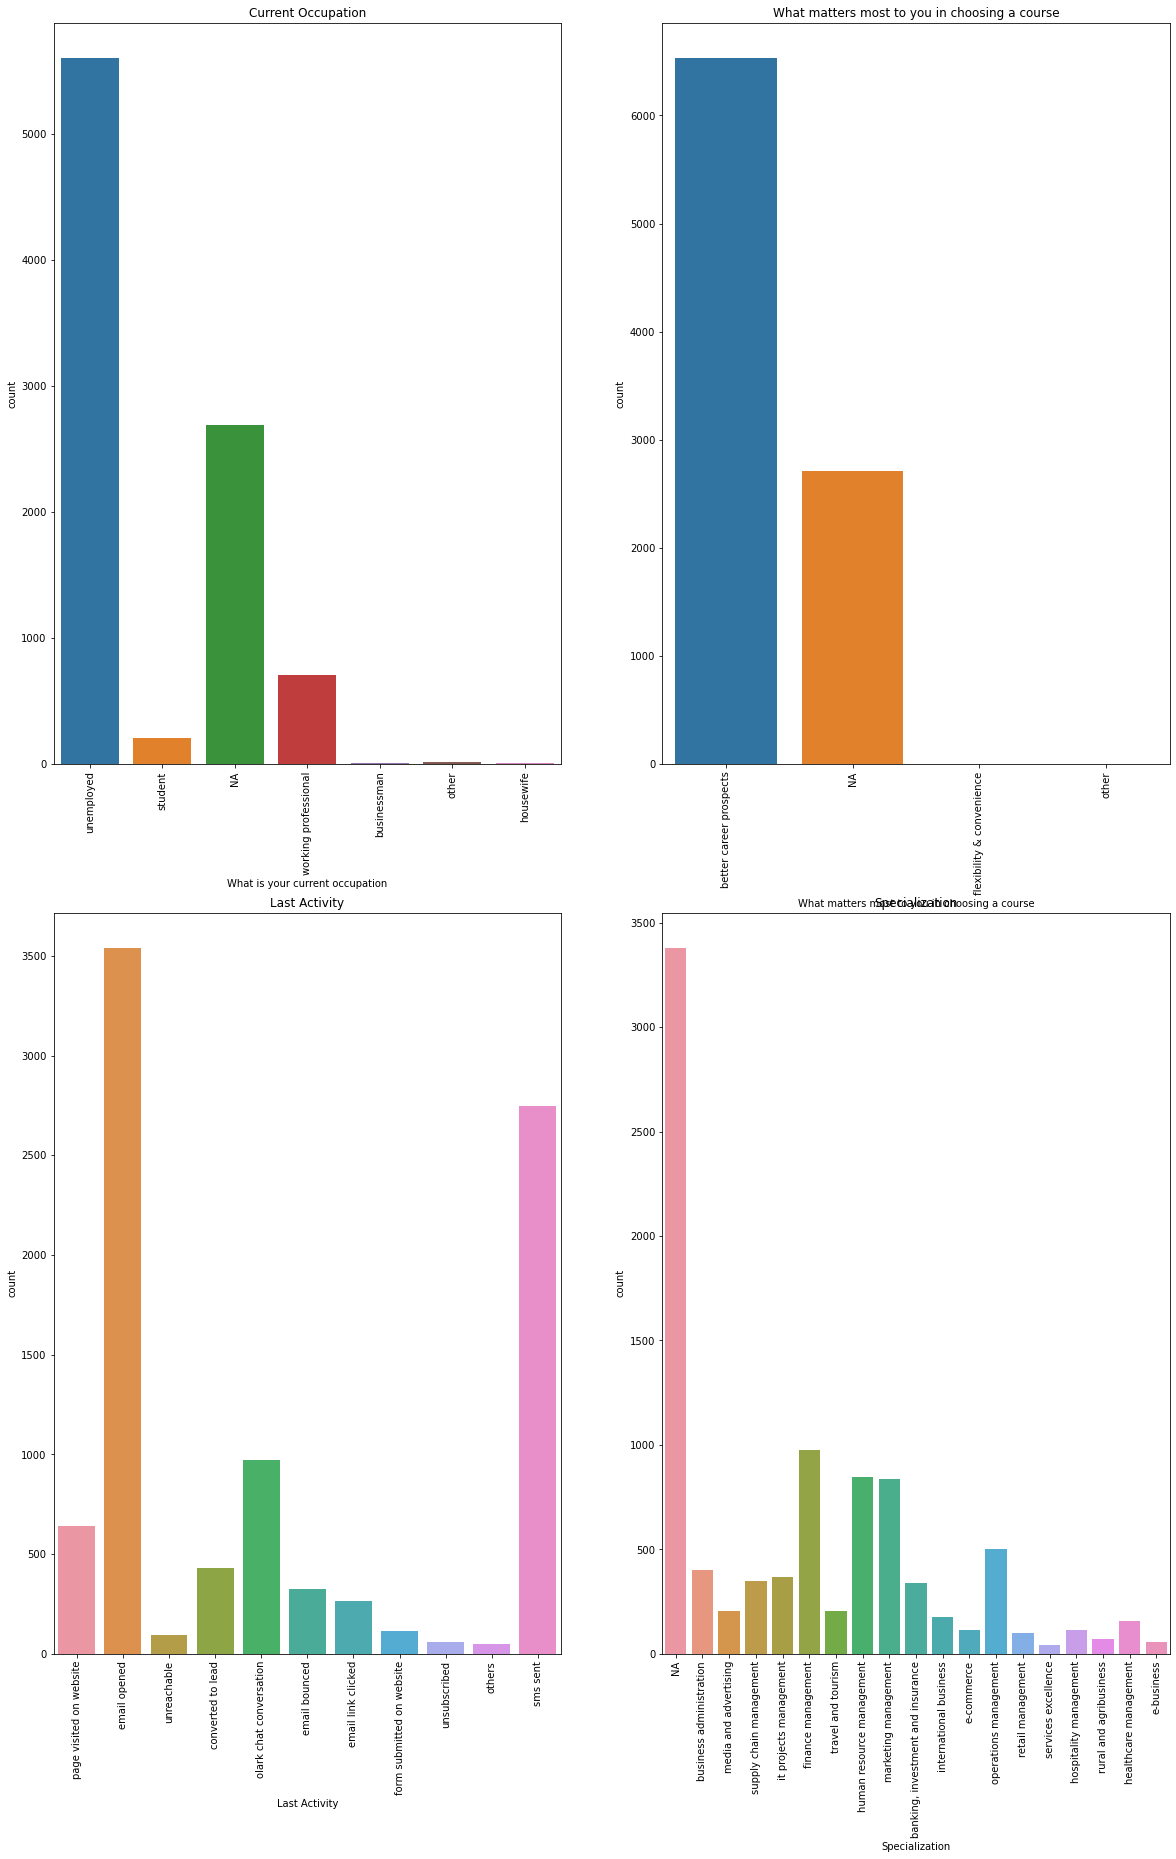

In [39]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.subplot(2,2,4)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

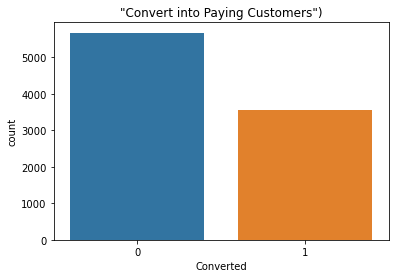

In [40]:
sns.countplot(df3['Converted'])
plt.title('"Convert into Paying Customers")')
plt.show()

In [41]:
# Count of Customers Not converted 
df3_0 = df3['Converted'][df3['Converted'] == 0]
df3_0.count()

5679

In [42]:
# Count of Customers converted into Paying Customers
df3_1 = df3['Converted'][df3['Converted'] == 1]
df3_1.count()

3561

#### 2.1.1. Numerical Variables

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

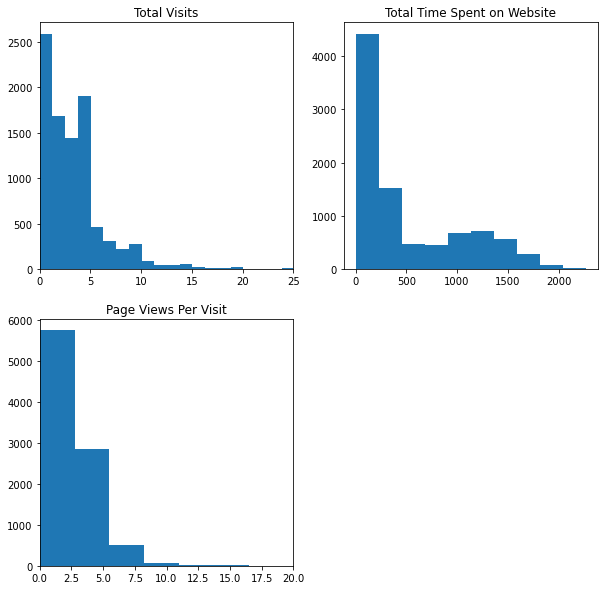

In [44]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

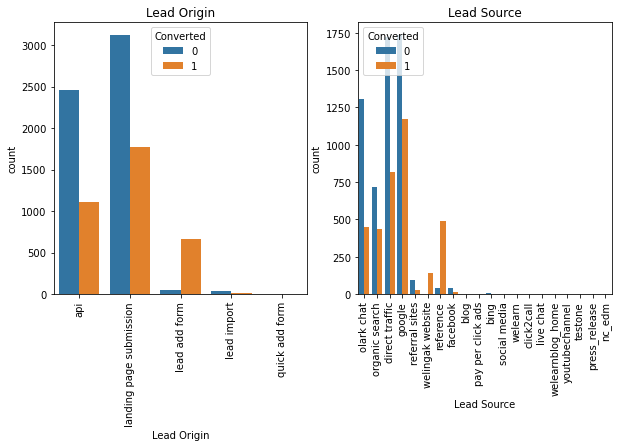

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

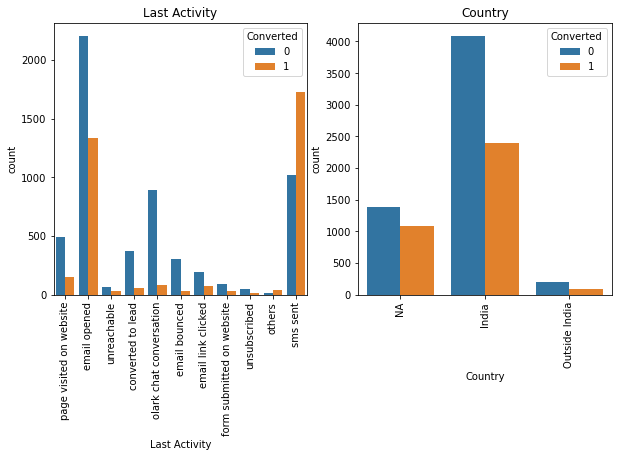

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

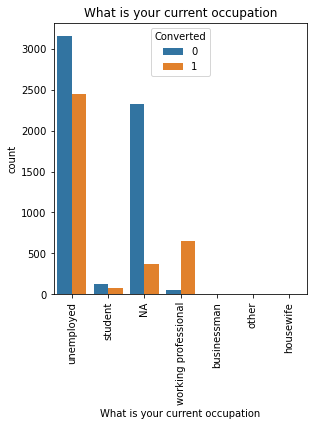

In [47]:
plt.figure(figsize = (10,5))

# plt.subplot(1,2,1)
# sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
# plt.title('Specialization')

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

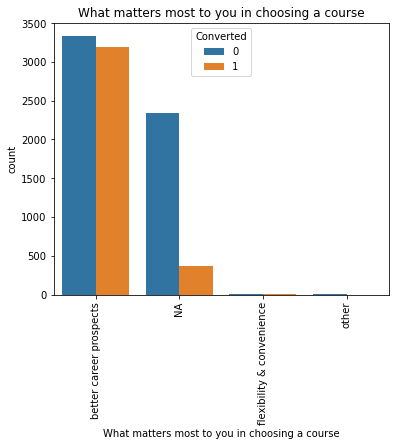

In [48]:
plt.figure(figsize = (6,5))

sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

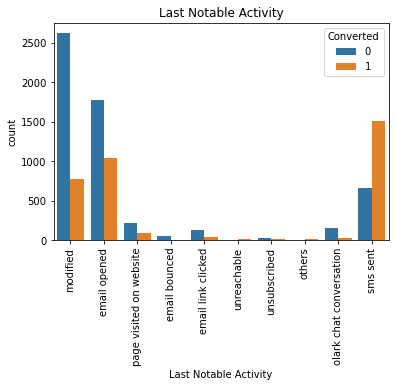

In [49]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

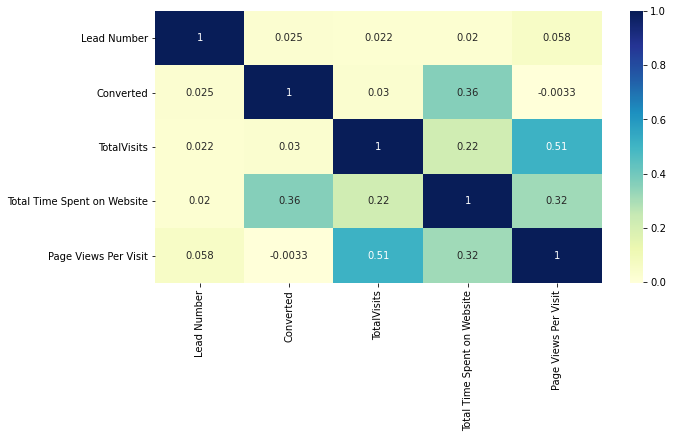

In [50]:
# Compute pairwise correlation of columns, excluding NA/null values
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr(method='pearson'),annot=True,cmap="YlGnBu")
plt.show()

In [51]:
# Compute pairwise correlation of Converted column, excluding NA/null values
df_final_corr = df_final.corr(method='pearson')['Converted']
df_final_corr.round(3).sort_values(ascending=False)

Converted                      1.000
Total Time Spent on Website    0.362
TotalVisits                    0.030
Lead Number                    0.025
Page Views Per Visit          -0.003
Name: Converted, dtype: float64

### <font color= red>___From the above Computed pairwise correlation of <font color = green>"Converted"</font> Column shows the strong correlation with <font color = green>"Total Time Spent on Website"</font> Column as compared with other columns___</font>

In [52]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


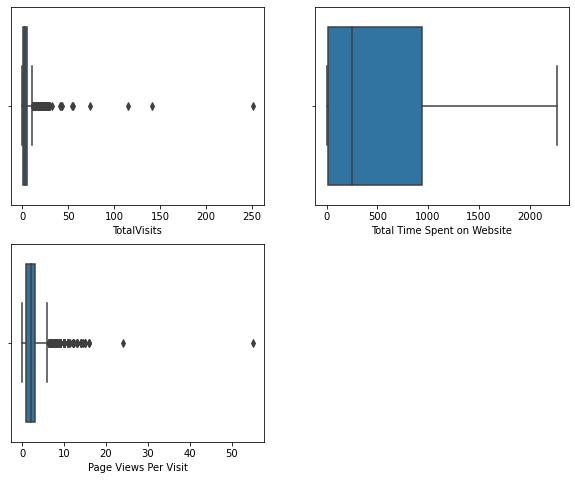

In [53]:
# Box Plot to find the outliers 
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
sns.boxplot('TotalVisits',data = df_final)
plt.subplot(2,2,2)
sns.boxplot('Total Time Spent on Website', data = df_final)
plt.subplot(2,2,3)
sns.boxplot('Page Views Per Visit',data = df_final)
plt.show()

### <font color= red>___There are outliers in the "TotalVisits" and "Page Views Per Visit". Capping of these outliers will help in the analysis___</font>

### <font color = Green>Capping Outliers</font>

In [54]:
# Capping Outliers:
columns = ["TotalVisits", "Page Views Per Visit"]
for col in columns:
    percentiles = df_final[col].quantile(0.99)
    df_final[col][df_final[col] >= percentiles] = percentiles

In [55]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.334415,487.698268,2.334429
std,3.228244,548.021466,1.970937
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


# 3: Data Preparation
- Create dummy variables for all the categorical features.
- Divide the data to train and test.
- Perform scaling.
- Divide the data into X and y.

## <font color = green>Dummy Variables:</font>

In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [57]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Lead Source','Specialization', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# concat the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Lead Origin                                           9240 non-null   object 
 2   Lead Source                                           9240 non-null   object 
 3   Converted                                             9240 non-null   int64  
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   int64  
 6   Page Views Per Visit                                  9240 non-null   float64
 7   Last Activity                                         9240 non-null   object 
 8   Country                                               9240

In [59]:
df_final_dum = df_final_dum.drop(['Lead Origin','Tags','City', 'Lead Source','Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 4. Test-Train Split

In [60]:
# Import the required library
from sklearn.model_selection import train_test_split

In [61]:
# Segregating the data into X dataframe and y
X = df_final_dum.drop(['Converted'], 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
# Traget variable y is Converted column
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### <font color = green>Scaling:</font>

In [64]:
# Import MinMax scaler 
from sklearn.preprocessing import MinMaxScaler
# Instantiate an object
scaler=MinMaxScaler()

# list of numaric variables
num_vars=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
print('\n')
print('Scaling of X_Train Data set: \n ',X_train[num_vars].describe()) # checking the variables (scaling)
print('\n')
print('y_Train Data set:\n', y_train.head())



Scaling of X_Train Data set: 
         TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  6468.000000           6468.000000                  6468.000000
mean      0.196343              0.258259                     0.212974
std       0.191614              0.218226                     0.240566
min       0.000000              0.000000                     0.000000
25%       0.058824              0.111111                     0.005282
50%       0.176471              0.222222                     0.108275
75%       0.294118              0.333333                     0.407790
max       1.000000              1.000000                     1.000000


y_Train Data set:
 1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64


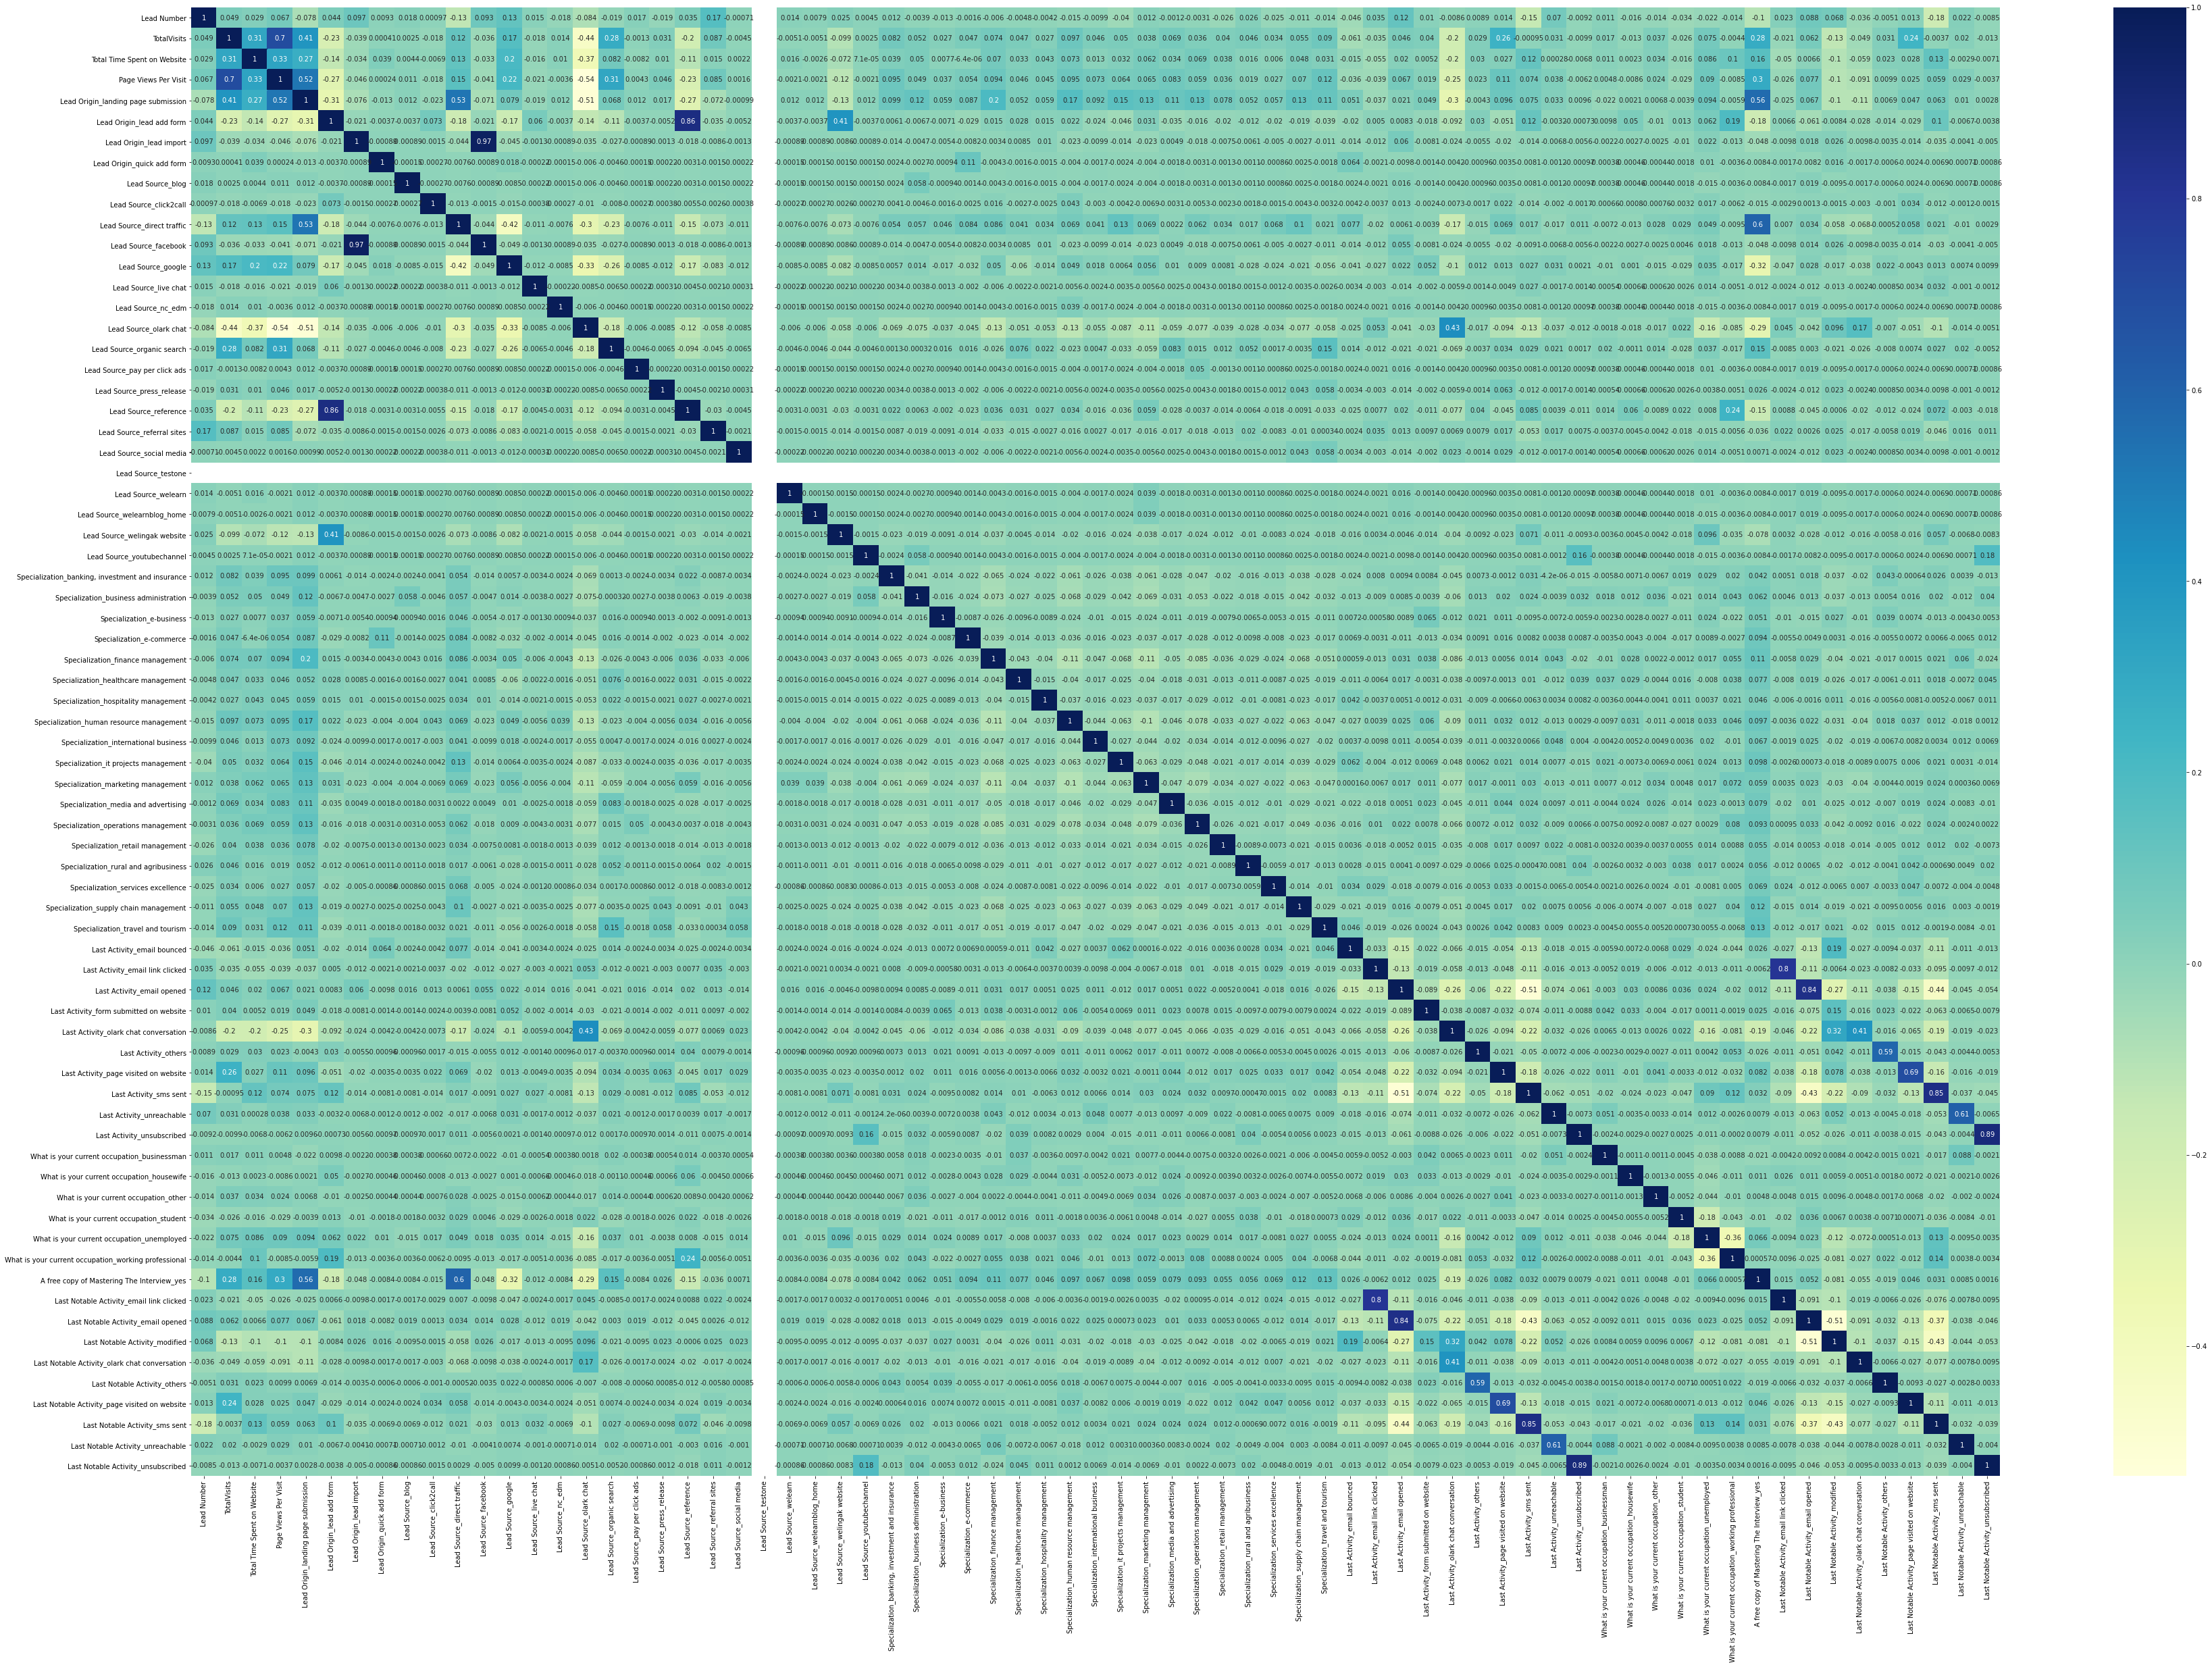

In [65]:
# To check the correlation among varibles
plt.figure(figsize=(60,40))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

<font color= red>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5.Data Modelling and Evaluation
- Create Linear Regression model using mixed approach.
- Check the various assumptions.
- Check the Adjusted R-Square for both test and train data.
- Report the final model.

In [66]:
# Multilinear Regression using RFE and Manual
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,25) # running RFE
rfe = rfe.fit(X_train,y_train)

# columns selected using RFE and displaying the columns along with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', False, 46),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 17),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 28),
 ('Lead Origin_quick add form', False, 24),
 ('Lead Source_blog', True, 1),
 ('Lead Source_click2call', True, 1),
 ('Lead Source_direct traffic', False, 3),
 ('Lead Source_facebook', True, 1),
 ('Lead Source_google', False, 6),
 ('Lead Source_live chat', False, 31),
 ('Lead Source_nc_edm', True, 1),
 ('Lead Source_olark chat', False, 39),
 ('Lead Source_organic search', False, 5),
 ('Lead Source_pay per click ads', True, 1),
 ('Lead Source_press_release', True, 1),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 4),
 ('Lead Source_social media', True, 1),
 ('Lead Source_testone', False, 47),
 ('Lead Source_welearn', True, 1),
 ('Lead Source_welearnblog_home', True, 1),
 ('Lead Source_welingak 

In [67]:
# collecting top 25 columns as ranked by RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_facebook', 'Lead Source_nc_edm',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_social media',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Last Activity_email opened', 'Last Activity_others',
       'Last Activity_sms sent', 'What is your current occupation_businessman',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_others', 'Last Notable Activity_sms sent',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [68]:
# not needed columns
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Lead Origin_landing page submission',
       'Lead Origin_lead import', 'Lead Origin_quick add form',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_live chat', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_testone', 'Lead Source_welingak website',
       'Lead Source_youtubechannel',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',


## <font color= green>___Model Building  Using Statsmodel:___</font>

In [69]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:29   Log-Likelihood:                -2720.9
No. Observations:                6468   AIC:                             5494.
Df Residuals:                    6442   BIC:                             5670.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [71]:
# Variance Inflation factor (VIF) for the X_train Data set
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
16,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.94
23,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.57
10,Lead Source_reference,4.34
0,TotalVisits,4.02
20,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
14,Last Activity_email opened,1.97
15,Last Activity_others,1.56


In [72]:
# Dropping the column having p value greater than 0.05 (i.e. 0.675)
X_train_new = X_train_rfe.drop('Lead Source_press_release',axis=1)

In [73]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(X_train_new)

# Recreate the Model after droping the column: Humidity (hum)
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:30   Log-Likelihood:                -2721.0
No. Observations:                6468   AIC:                             5492.
Df Residuals:                    6443   BIC:                             5661.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [74]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
22,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.57
9,Lead Source_reference,4.34
0,TotalVisits,4.02
19,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
13,Last Activity_email opened,1.97
14,Last Activity_others,1.56


In [75]:
# drop Lead Source_welearnblog_home
# Drop the variable Lead Source_welearnblog_home is having 0.642 p value
X_train_new2 = X_train_new.drop('Lead Source_welearnblog_home',axis=1)

# Adding the constant to train data set
X_train_rfe2 = sm.add_constant(X_train_new2)

# Recreate the Model after droping the column
lm = sm.OLS(y_train,X_train_rfe2)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:30   Log-Likelihood:                -2721.1
No. Observations:                6468   AIC:                             5490.
Df Residuals:                    6444   BIC:                             5653.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [76]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: Lead Source_welearnblog_home
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF']= [variance_inflation_factor(X_train_new2.values,i)for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
21,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.57
9,Lead Source_reference,4.34
0,TotalVisits,4.02
18,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
12,Last Activity_email opened,1.96
13,Last Activity_others,1.56


In [77]:
# Drop the variable Lead Source_pay per click ads is having 0.571 p value
X_train_new3 = X_train_new2.drop('Lead Source_pay per click ads',axis=1)

# Adding the constant to train data set
X_train_rfe3 = sm.add_constant(X_train_new3)

# Recreate the Model after droping the column: Humidity (hum)
lm = sm.OLS(y_train,X_train_rfe3)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:31   Log-Likelihood:                -2721.3
No. Observations:                6468   AIC:                             5489.
Df Residuals:                    6445   BIC:                             5644.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [78]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: Temperature (temp)
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF']= [variance_inflation_factor(X_train_new3.values,i)for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
20,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.57
8,Lead Source_reference,4.34
0,TotalVisits,4.02
17,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
11,Last Activity_email opened,1.96
12,Last Activity_others,1.56


In [79]:
# Dropping the Column: Lead Source_blog is having P- value : 0.562 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new4 = X_train_new3.drop('Lead Source_blog',axis =1)

# Adding the constant to train data set
X_train_rfe4 = sm.add_constant(X_train_new4)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe4)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:31   Log-Likelihood:                -2721.4
No. Observations:                6468   AIC:                             5487.
Df Residuals:                    6446   BIC:                             5636.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [80]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF']= [variance_inflation_factor(X_train_new4.values,i)for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
19,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.57
7,Lead Source_reference,4.34
0,TotalVisits,4.02
16,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
10,Last Activity_email opened,1.96
11,Last Activity_others,1.56


In [81]:
#
# Dropping the Column: Lead Source_blog is having P- value : 0.455 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new5 = X_train_new4.drop('Lead Source_click2call',axis =1)

# Adding the constant to train data set
X_train_rfe5 = sm.add_constant(X_train_new5)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe5)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     237.4
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:31   Log-Likelihood:                -2721.7
No. Observations:                6468   AIC:                             5485.
Df Residuals:                    6447   BIC:                             5628.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [82]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF']= [variance_inflation_factor(X_train_new5.values,i)for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
18,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.46
6,Lead Source_reference,4.27
0,TotalVisits,4.02
15,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
9,Last Activity_email opened,1.96
10,Last Activity_others,1.56


In [83]:
# Dropping the Column: Lead Source_blog is having P- value : 0.267 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new6 = X_train_new5.drop('Lead Source_social media',axis =1)

# Adding the constant to train data set
X_train_rfe6 = sm.add_constant(X_train_new6)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe6)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:32   Log-Likelihood:                -2722.3
No. Observations:                6468   AIC:                             5485.
Df Residuals:                    6448   BIC:                             5620.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [84]:
 # Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new6.columns
vif['VIF']= [variance_inflation_factor(X_train_new6.values,i)for i in range(X_train_new6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
17,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.46
6,Lead Source_reference,4.27
0,TotalVisits,4.02
14,What is your current occupation_unemployed,2.65
1,Total Time Spent on Website,2.12
8,Last Activity_email opened,1.96
9,Last Activity_others,1.56


In [85]:
# Dropping the Column: Lead Source_blog is having P- value : 0.253 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new7 = X_train_new6.drop('What is your current occupation_businessman',axis =1)

# Adding the constant to train data set
X_train_rfe7 = sm.add_constant(X_train_new7)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe7)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     263.7
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:32   Log-Likelihood:                -2723.0
No. Observations:                6468   AIC:                             5484.
Df Residuals:                    6449   BIC:                             5613.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [86]:
 # Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new7.columns
vif['VIF']= [variance_inflation_factor(X_train_new7.values,i)for i in range(X_train_new7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
16,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.46
6,Lead Source_reference,4.26
0,TotalVisits,4.02
13,What is your current occupation_unemployed,2.64
1,Total Time Spent on Website,2.12
8,Last Activity_email opened,1.96
9,Last Activity_others,1.56


In [87]:
# Dropping the Column: Lead Source_blog is having P- value : 0.253 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new8 = X_train_new7.drop('Lead Source_welearn',axis =1)

# Adding the constant to train data set
X_train_rfe8 = sm.add_constant(X_train_new8)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe8)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     279.1
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:32   Log-Likelihood:                -2723.7
No. Observations:                6468   AIC:                             5483.
Df Residuals:                    6450   BIC:                             5605.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [88]:
 # Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new8.columns
vif['VIF']= [variance_inflation_factor(X_train_new8.values,i)for i in range(X_train_new8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
15,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.46
6,Lead Source_reference,4.26
0,TotalVisits,4.02
12,What is your current occupation_unemployed,2.64
1,Total Time Spent on Website,2.12
7,Last Activity_email opened,1.96
8,Last Activity_others,1.56


In [89]:
# Dropping the Column: Lead Source_nc_edm is having P- value : 0.111 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new9 = X_train_new8.drop('Lead Source_nc_edm',axis =1)

# Adding the constant to train data set
X_train_rfe9 = sm.add_constant(X_train_new9)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe9)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     296.3
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:32   Log-Likelihood:                -2725.0
No. Observations:                6468   AIC:                             5484.
Df Residuals:                    6451   BIC:                             5599.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [90]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new9.columns
vif['VIF']= [variance_inflation_factor(X_train_new9.values,i)for i in range(X_train_new9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_sms sent,5.51
2,Page Views Per Visit,4.93
14,Last Notable Activity_sms sent,4.90
3,Lead Origin_lead add form,4.46
5,Lead Source_reference,4.26
0,TotalVisits,4.02
11,What is your current occupation_unemployed,2.64
1,Total Time Spent on Website,2.12
6,Last Activity_email opened,1.96
7,Last Activity_others,1.56


In [91]:
# Dropping the Column: Lead Source_nc_edm is having P- value : 0.111 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new10 = X_train_new9.drop('Lead Source_facebook',axis =1)

# Adding the constant to train data set
X_train_rfe10 = sm.add_constant(X_train_new10)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe10)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     315.7
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:32   Log-Likelihood:                -2726.5
No. Observations:                6468   AIC:                             5485.
Df Residuals:                    6452   BIC:                             5593.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [92]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new10.columns
vif['VIF']= [variance_inflation_factor(X_train_new10.values,i)for i in range(X_train_new10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_sms sent,5.49
2,Page Views Per Visit,4.93
13,Last Notable Activity_sms sent,4.89
3,Lead Origin_lead add form,4.45
4,Lead Source_reference,4.26
0,TotalVisits,4.02
10,What is your current occupation_unemployed,2.64
1,Total Time Spent on Website,2.11
5,Last Activity_email opened,1.95
6,Last Activity_others,1.56


In [93]:
# Dropping the Column: Lead Source_nc_edm is having P- value : 0.111 i.e. greater than 0.05 (5%) (significance level - 5%)
X_train_new11 = X_train_new10.drop('Last Activity_sms sent',axis =1)

# Adding the constant to train data set
X_train_rfe11 = sm.add_constant(X_train_new11)

# Recreate the Model after droping the column: holiday
lm = sm.OLS(y_train,X_train_rfe11)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     329.4
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:15:33   Log-Likelihood:                -2762.7
No. Observations:                6468   AIC:                             5555.
Df Residuals:                    6453   BIC:                             5657.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### <font color = red>___Validating the autocorrelation  in residuals from regression analysis ( Durbin-Watson )___</font>
- #### dw =  1.981 ...which is within acceptance range at alpha equal to 0.05 
- #### No autocorrelation in residuals with any of its lagged versions. Hence its a good linear regression model
- #### Does not violate the autocorrelation assumption of residuals

In [94]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column: holiday
vif = pd.DataFrame()
vif['Features'] = X_train_new11.columns
vif['VIF']= [variance_inflation_factor(X_train_new11.values,i)for i in range(X_train_new11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.80
3,Lead Origin_lead add form,4.42
4,Lead Source_reference,4.26
0,TotalVisits,4.01
9,What is your current occupation_unemployed,2.61
1,Total Time Spent on Website,2.10
5,Last Activity_email opened,1.84
12,Last Notable Activity_sms sent,1.73
6,Last Activity_others,1.55
11,Last Notable Activity_others,1.53


## 6. Creating Prediction

### Residual Analysis of the Train Data

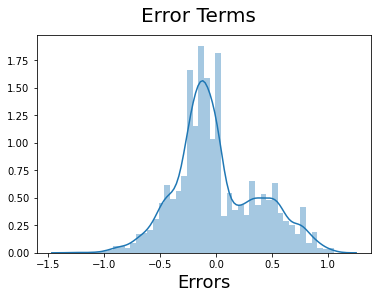

In [95]:
y_train_pred = lm.predict(X_train_rfe11)
# calculate the residual and ploting the distribution curve 
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel("Errors",fontsize = 18)
plt.show()

In [96]:
# Predicting the probabilities on the train set
y_train_pred[:10]

1871    0.235904
6795    0.384791
3516    0.238943
8105    0.720699
3934    0.235904
4844    1.216684
3297    0.220642
8071    1.152491
987     0.223019
7423    0.919552
dtype: float64

In [97]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23590388, 0.38479107, 0.23894285, 0.72069923, 0.23590388,
       1.2166845 , 0.22064234, 1.15249141, 0.22301937, 0.91955158])

In [98]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.235904
1,0,0.384791
2,0,0.238943
3,0,0.720699
4,0,0.235904


In [99]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.235904,0
1,0,0.384791,0
2,0,0.238943,0
3,0,0.720699,1
4,0,0.235904,0


Text(0, 0.5, 'y_pred')

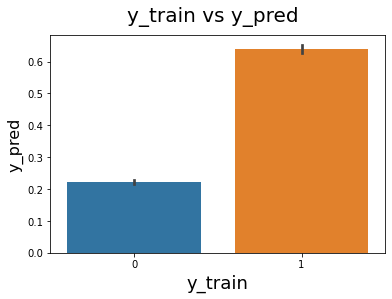

In [100]:
# plotting y_train  and y_train_pred to understand the spread
fig = plt.figure()
sns.barplot(y_train,y_train_pred)
#sns.regplot(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred',fontsize = 20)
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)

## 7. Model Evaluation

In [101]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3592,  410],
       [ 816, 1650]], dtype=int64)

In [102]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8104514533085961

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [103]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [104]:
# Calculating the sensitivity
TP/(TP+FN)

0.6690997566909975

In [105]:
# Calculating the specificity
TN/(TN+FP)

0.8975512243878061

## <font color= red>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 66.90% and specificity of around 89.75%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [106]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

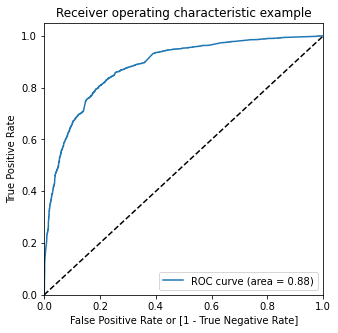

In [108]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## <font color= red>___The area under ROC curve is 0.88 which is a very good value.___</font>

In [109]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235904,0,1,1,1,0,0,0,0,0,0,0
1,0,0.384791,0,1,1,1,1,0,0,0,0,0,0
2,0,0.238943,0,1,1,1,0,0,0,0,0,0,0
3,0,0.720699,1,1,1,1,1,1,1,1,1,0,0
4,0,0.235904,0,1,1,1,0,0,0,0,0,0,0


In [110]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.466914,0.993917,0.142179
0.1,0.1,0.543135,0.983779,0.271614
0.2,0.2,0.700216,0.946878,0.548226
0.3,0.3,0.778448,0.869424,0.722389
0.4,0.4,0.804113,0.798865,0.807346
0.5,0.5,0.810451,0.669100,0.897551
0.6,0.6,0.787260,0.534469,0.943028
0.7,0.7,0.750000,0.392133,0.970515
0.8,0.8,0.719852,0.290754,0.984258
0.9,0.9,0.682282,0.174777,0.995002


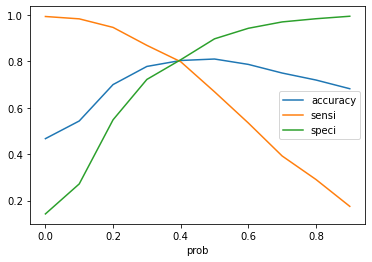

In [111]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## <font color= red>___From the graph it is visible that the optimal cut off is at 0.40___</font>

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235904,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.384791,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.238943,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.720699,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.235904,0,1,1,1,0,0,0,0,0,0,0,0


In [113]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8041125541125541

In [114]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3231,  771],
       [ 496, 1970]], dtype=int64)

In [115]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Calculating the sensitivity
TP/(TP+FN)

0.7988645579886455

In [117]:
# Calculating the specificity
TN/(TN+FP)

0.8073463268365817

## <font color= red>___With the current cut off as 0.40 we have accuracy: 79.54%, sensitivity: 83.62% and specificity of around 77.04%.___</font>

## 8. Prediction on Test set

In [118]:
# list of numaric variables
num_vars=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# transform 
X_test[num_vars]=scaler.transform(X_test[num_vars])

# checking the variables after transforming data using train data set 
print('Scaling of Test Data set:  \n ',X_test[num_vars].describe()) 

Scaling of Test Data set:  
         TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  2772.000000           2772.000000                  2772.000000
mean      0.195674              0.262000                     0.218582
std       0.185862              0.220791                     0.242693
min       0.000000              0.000000                     0.000000
25%       0.058824              0.111111                     0.005722
50%       0.176471              0.222222                     0.113556
75%       0.294118              0.388889                     0.417694
max       1.000000              1.000000                     0.991637


## <font color = red>___We can observe that, the maximum value of test data variables  are near about 1 or slightly above 1, but not exactly 1. Because the MinMaxScaler was fit and transform on train data set and later we are tranforming it on test data. Hence its max values are near about 1 but not exactly 1.___</font>

In [119]:
# Substituting all the columns in the final train model
col = X_train_new11.columns

In [120]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()
print(X_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2772 non-null   float64
 1   Total Time Spent on Website                           2772 non-null   float64
 2   Page Views Per Visit                                  2772 non-null   float64
 3   Lead Origin_lead add form                             2772 non-null   uint8  
 4   Lead Source_reference                                 2772 non-null   uint8  
 5   Last Activity_email opened                            2772 non-null   uint8  
 6   Last Activity_others                                  2772 non-null   uint8  
 7   What is your current occupation_housewife             2772 non-null   uint8  
 8   What is your current occupation_student               2

In [121]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = lm.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.452836
1,1,0.894973
2,1,0.766874
3,0,0.126952
4,1,0.674702


In [122]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.452836,1
1,1,0.894973,1
2,1,0.766874,1
3,0,0.126952,0
4,1,0.674702,1
...,...,...,...
2767,0,0.198285,0
2768,1,1.026006,1
2769,0,0.235904,0
2770,0,0.421484,1


In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8048340548340548

In [124]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1358,  319],
       [ 222,  873]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [126]:
# Calculating the sensitivity
TP/(TP+FN)

0.7972602739726027

In [127]:
# Calculating the specificity
TN/(TN+FP)

0.8097793679189028

## <font color= red>___With the current cut off as 0.40 we have accuracy: 76.20%, sensitivity: 55.52% and specificity of around 90%.___</font>

## 9. Precision-Recall

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3592,  410],
       [ 816, 1650]], dtype=int64)

In [129]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8009708737864077

In [130]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6690997566909975

## <font color= red>___With the current cut off as 0.40 we have Precision around 80.09% and Recall around 66.90%___</font>

### 9.1. Precision and recall tradeoff

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

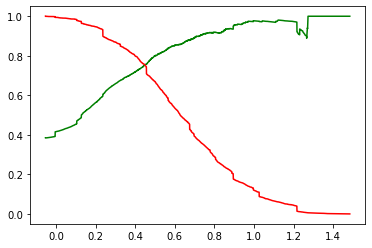

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color = red>___From the above plot we can predict the cut off 0.42.___<font>

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235904,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.384791,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.238943,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.720699,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.235904,0,1,1,1,0,0,0,0,0,0,0,0


In [136]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8076685219542362

In [137]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3300,  702],
       [ 542, 1924]], dtype=int64)

In [138]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [139]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7326732673267327

In [140]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7802108678021087

## <font color= red>___With the current cut off as 0.42 we have Precision around 73.26% and Recall around 78.02%___</font>

# Conclusion & Recommendation

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. What is your current occupation_housewife.
3. When the lead source was: <br>
a. Google<br>
b. Direct traffic<br>
c. Organic search<br>
4. Lead Origin_lead add form.
5. What is your current occupation_working professional.
6. Last Notable Activity_unreachable: <br> 
a. modified<br>
b. email opened<br>
c. sms sent<br>
7. Last Activity_others
8. TotalVisits
9. What is your current occupation_student
10. What is your current occupation_unemployed.
11. Last Activity<br>
a.email opened <br>
b.sms sent <br>
c.olark chat conversation.<br>

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.



<font color= red> X Education shouldn't focus on the following:
1. Page Views Per Visit
2. Lead Source_reference.</font>